In [140]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('Cars.csv')

In [68]:
df

,name,owner,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,Maruti 800 AC,0,2,60000,70000,0,1,0,1,1
1,Maruti Wagon R LXI Minor,0,2,135000,50000,0,1,0,1,1
2,Hyundai Verna 1.6 SX,0,3,600000,100000,1,0,0,1,1
3,Datsun RediGO T Option,0,4,250000,46000,0,1,0,1,1
4,Honda Amaze VX i-DTEC,1,3,450000,141000,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),1,3,409999,80000,1,0,0,1,1
4336,Hyundai i20 Magna 1.4 CRDi,1,3,409999,80000,1,0,0,1,1
4337,Maruti 800 AC BSIII,1,2,110000,83000,0,1,0,1,1
4338,Hyundai Creta 1.6 CRDi SX Option,0,4,865000,90000,1,0,0,1,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    4340 non-null   object
 1   owner                   4340 non-null   int64 
 2   year                    4340 non-null   int64 
 3   selling_price           4340 non-null   int64 
 4   km_driven               4340 non-null   int64 
 5   fuel_Diesel             4340 non-null   int64 
 6   fuel_Petrol             4340 non-null   int64 
 7   seller_type_Dealer      4340 non-null   int64 
 8   seller_type_Individual  4340 non-null   int64 
 9   transmission_Manual     4340 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 339.2+ KB


In [70]:
df['owner'].value_counts()

0    2832
1    1508
Name: owner, dtype: int64

In [71]:
df = df.set_index('name')

In [72]:
df

,owner,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
name,,,,,,,,,
Maruti 800 AC,0,2,60000,70000,0,1,0,1,1
Maruti Wagon R LXI Minor,0,2,135000,50000,0,1,0,1,1
Hyundai Verna 1.6 SX,0,3,600000,100000,1,0,0,1,1
Datsun RediGO T Option,0,4,250000,46000,0,1,0,1,1
Honda Amaze VX i-DTEC,1,3,450000,141000,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),1,3,409999,80000,1,0,0,1,1
Hyundai i20 Magna 1.4 CRDi,1,3,409999,80000,1,0,0,1,1
Maruti 800 AC BSIII,1,2,110000,83000,0,1,0,1,1


In [73]:
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(df.iloc[:,1:], df.iloc[:,0])

In [74]:
X_os

,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,2,60000,70000,0,1,0,1,1
1,2,135000,50000,0,1,0,1,1
2,3,600000,100000,1,0,0,1,1
3,4,250000,46000,0,1,0,1,1
4,3,450000,141000,1,0,0,1,1
...,...,...,...,...,...,...,...,...
5659,3,320000,70000,0,1,0,1,1
5660,2,110000,154000,1,0,0,1,1
5661,3,390000,70000,1,0,0,1,1
5662,2,135000,90000,0,1,0,1,1


In [75]:
X_os.insert(0,'Owners',y_os)

In [76]:
df = X_os

In [77]:
df

,Owners,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,0,2,60000,70000,0,1,0,1,1
1,0,2,135000,50000,0,1,0,1,1
2,0,3,600000,100000,1,0,0,1,1
3,0,4,250000,46000,0,1,0,1,1
4,1,3,450000,141000,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
5659,1,3,320000,70000,0,1,0,1,1
5660,1,2,110000,154000,1,0,0,1,1
5661,1,3,390000,70000,1,0,0,1,1
5662,1,2,135000,90000,0,1,0,1,1


In [78]:
df['Owners'].value_counts()

0    2832
1    2832
Name: Owners, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size = .2)

In [80]:
X_train

,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
5524,2,170000,50000,0,1,0,1,1
5362,3,700000,110000,1,0,0,1,1
827,3,170000,60000,1,0,0,1,1
1205,3,351000,40000,0,1,0,1,1
3152,4,350000,7658,0,1,1,0,0
...,...,...,...,...,...,...,...,...
4976,4,1165000,13000,0,1,1,0,0
1647,3,160000,80000,0,1,0,1,1
4349,2,250000,80000,1,0,0,1,1
4893,2,110000,110000,0,1,0,1,1


In [81]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       554
           1       0.68      0.79      0.73       579

    accuracy                           0.71      1133
   macro avg       0.71      0.70      0.70      1133
weighted avg       0.71      0.71      0.70      1133



In [82]:
y_pred = logreg.predict_proba(X_test) #Extract sigmoid probabilities
y_pred

array([[0.74391299, 0.25608701],
       [0.39702994, 0.60297006],
       [0.29701757, 0.70298243],
       ...,
       [0.2732236 , 0.7267764 ],
       [0.23120647, 0.76879353],
       [0.85709675, 0.14290325]])

In [88]:
y_pred = y_pred[::,1]

In [89]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

In [93]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7571095440289807

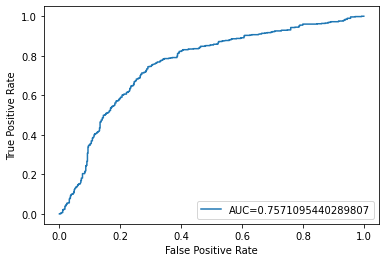

In [94]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [97]:
np.argmax(tpr - fpr)

289

In [102]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = _[optimal_idx]
optimal_threshold

0.5365436747874811

In [103]:
y_pred

array([0.25608701, 0.60297006, 0.70298243, ..., 0.7267764 , 0.76879353,
       0.14290325])

In [107]:
y_pred = (y_pred > .5365).astype(int)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       554
           1       0.73      0.74      0.74       579

    accuracy                           0.73      1133
   macro avg       0.73      0.73      0.73      1133
weighted avg       0.73      0.73      0.73      1133



In [38]:
4531**.5

67.31270311018568

In [50]:
df

,Owners,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,0,2,60000,70000,0,1,0,1,1
1,0,2,135000,50000,0,1,0,1,1
2,0,3,600000,100000,1,0,0,1,1
3,0,4,250000,46000,0,1,0,1,1
4,1,3,450000,141000,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
5659,1,2,699000,101849,1,0,1,0,1
5660,1,3,600000,60000,1,0,0,1,1
5661,1,3,200000,70000,1,0,0,1,1
5662,1,3,450000,260000,1,0,0,1,1


In [123]:
df = pd.read_csv('knn.csv')

In [124]:
df = df.set_index('name')
df

,year,selling_price,km_driven,owner,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
name,,,,,,,,,,,,
Maruti 800 AC,2,60000,70000,0,0,0,1,0,1,0,0,1
Maruti Wagon R LXI Minor,2,135000,50000,0,0,0,1,0,1,0,0,1
Hyundai Verna 1.6 SX,3,600000,100000,0,1,0,0,0,1,0,0,1
Datsun RediGO T Option,4,250000,46000,0,0,0,1,0,1,0,0,1
Honda Amaze VX i-DTEC,3,450000,141000,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),3,409999,80000,1,1,0,0,0,1,0,0,1
Hyundai i20 Magna 1.4 CRDi,3,409999,80000,1,1,0,0,0,1,0,0,1
Maruti 800 AC BSIII,2,110000,83000,1,0,0,1,0,1,0,0,1


In [125]:
owner = df.pop('owner')
df.insert(0,'owner',owner)
df

,owner,year,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
name,,,,,,,,,,,,
Maruti 800 AC,0,2,60000,70000,0,0,1,0,1,0,0,1
Maruti Wagon R LXI Minor,0,2,135000,50000,0,0,1,0,1,0,0,1
Hyundai Verna 1.6 SX,0,3,600000,100000,1,0,0,0,1,0,0,1
Datsun RediGO T Option,0,4,250000,46000,0,0,1,0,1,0,0,1
Honda Amaze VX i-DTEC,1,3,450000,141000,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),1,3,409999,80000,1,0,0,0,1,0,0,1
Hyundai i20 Magna 1.4 CRDi,1,3,409999,80000,1,0,0,0,1,0,0,1
Maruti 800 AC BSIII,1,2,110000,83000,0,0,1,0,1,0,0,1


In [126]:
for i in ['year','selling_price','km_driven']:
    df[i] = (df[i]-df[i].mean())/df[i].std()

In [127]:
df

,owner,year,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
name,,,,,,,,,,,,
Maruti 800 AC,0,-1.176049,-0.767658,0.081130,0,0,1,0,1,0,0,1
Maruti Wagon R LXI Minor,0,-1.176049,-0.638023,-0.347649,0,0,1,0,1,0,0,1
Hyundai Verna 1.6 SX,0,-0.032412,0.165712,0.724298,1,0,0,0,1,0,0,1
Datsun RediGO T Option,0,1.111226,-0.439250,-0.433405,0,0,1,0,1,0,0,1
Honda Amaze VX i-DTEC,1,-0.032412,-0.093557,1.603294,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),1,-0.032412,-0.162697,0.295519,1,0,0,0,1,0,0,1
Hyundai i20 Magna 1.4 CRDi,1,-0.032412,-0.162697,0.295519,1,0,0,0,1,0,0,1
Maruti 800 AC BSIII,1,-1.176049,-0.681234,0.359836,0,0,1,0,1,0,0,1


In [128]:
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(df.iloc[:,1:], df.iloc[:,0])
X_os.insert(0,'Owners',y_os)
df = X_os

In [129]:
df

,Owners,year,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,-1.176049,-0.767658,0.081130,0,0,1,0,1,0,0,1
1,0,-1.176049,-0.638023,-0.347649,0,0,1,0,1,0,0,1
2,0,-0.032412,0.165712,0.724298,1,0,0,0,1,0,0,1
3,0,1.111226,-0.439250,-0.433405,0,0,1,0,1,0,0,1
4,1,-0.032412,-0.093557,1.603294,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1,-2.319687,-0.672594,0.509908,0,0,1,1,0,0,0,1
5660,1,1.111226,0.857098,-0.133260,1,0,0,0,1,0,0,1
5661,1,-1.176049,-0.214549,0.124008,1,0,0,0,1,0,0,1
5662,1,1.111226,1.429219,-1.397943,1,0,0,1,0,0,0,1


In [116]:
y_train

5524    1
5362    1
827     0
1205    1
3152    0
       ..
4976    1
1647    0
4349    1
4893    1
4262    0
Name: Owners, Length: 4531, dtype: int64

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size = .2)

In [65]:
knn = KNeighborsClassifier(n_neighbors=67)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       583
           1       0.70      0.76      0.73       550

    accuracy                           0.73      1133
   macro avg       0.73      0.73      0.73      1133
weighted avg       0.73      0.73      0.73      1133



In [136]:
k = np.array([])
Accuracy = np.array([])
for i in range(1,1000,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    k = np.append(k,i)
    acc = accuracy_score(y_test,y_pred)
    Accuracy = np.append(Accuracy,acc)

In [138]:
Accuracy

array([0.84642542, 0.79964695, 0.78552515, 0.78640777, 0.76699029,
       0.76522507, 0.76169462, 0.75904678, 0.74933804, 0.75286849,
       0.75639894, 0.75463372, 0.75463372, 0.75728155, 0.75198588,
       0.75110327, 0.74580759, 0.74404237, 0.7466902 , 0.74933804,
       0.7466902 , 0.74404237, 0.74757282, 0.74227714, 0.74492498,
       0.74139453, 0.74139453, 0.73874669, 0.73609885, 0.73786408,
       0.73521624, 0.73345102, 0.73433363, 0.74051192, 0.73874669,
       0.73609885, 0.73433363, 0.73433363, 0.73521624, 0.73433363,
       0.73168579, 0.7325684 , 0.73521624, 0.73786408, 0.73609885,
       0.73521624, 0.73433363, 0.72903795, 0.72992056, 0.73168579,
       0.72727273, 0.72815534, 0.72815534, 0.72903795, 0.73080318,
       0.73080318, 0.72992056, 0.73080318, 0.73080318, 0.72992056,
       0.72992056, 0.72992056, 0.73080318, 0.73080318, 0.73168579,
       0.73080318, 0.72992056, 0.73433363, 0.73433363, 0.7325684 ,
       0.73345102, 0.73168579, 0.73433363, 0.73433363, 0.73521

In [147]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       554
           1       0.82      0.89      0.86       579

    accuracy                           0.85      1133
   macro avg       0.85      0.85      0.85      1133
weighted avg       0.85      0.85      0.85      1133



In [148]:
df

,Owners,year,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,-1.176049,-0.767658,0.081130,0,0,1,0,1,0,0,1
1,0,-1.176049,-0.638023,-0.347649,0,0,1,0,1,0,0,1
2,0,-0.032412,0.165712,0.724298,1,0,0,0,1,0,0,1
3,0,1.111226,-0.439250,-0.433405,0,0,1,0,1,0,0,1
4,1,-0.032412,-0.093557,1.603294,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1,-2.319687,-0.672594,0.509908,0,0,1,1,0,0,0,1
5660,1,1.111226,0.857098,-0.133260,1,0,0,0,1,0,0,1
5661,1,-1.176049,-0.214549,0.124008,1,0,0,0,1,0,0,1
5662,1,1.111226,1.429219,-1.397943,1,0,0,1,0,0,0,1


In [149]:
CV = cross_validate(knn,df.iloc[:,1:], df.iloc[:,0], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

Accuracy
[0.80246914 0.80952381 0.85185185 0.78306878 0.78621908 0.88869258
 0.86749117 0.84275618 0.84275618 0.88162544]


In [150]:
print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Average Accuracy =  0.8356454216289316
